In [1]:
import tweepy
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import json
import pandas as pd

Provide you own access id to twitter developer account.

In [2]:
access_token = "**********************"
access_token_secret = "*************************"
consumer_key = "*****************************"
consumer_secret = "**************************"

In [3]:
auth=tweepy.OAuthHandler(consumer_key, consumer_secret)

In [4]:
auth.set_access_token(access_token, access_token_secret)

In [5]:
api=tweepy.API(auth)

In [6]:
import datetime

In [7]:
PositiveWords=pd.read_table('F:/IVY PRO/Python/Python Datasets/Sentiment Analysis/Positive_words.txt',encoding='latin-1')
NegativeWords=pd.read_table('F:/IVY PRO/Python/Python Datasets/Sentiment Analysis//Negative_words.txt',encoding='latin-1')

In [8]:
import re
import numpy as np

### Function to compute sentiment score of a sentence

In [9]:
def ComputeSentimentScore(inpSentence):
    PositiveScore=0
    NegativeScore=0
    OverallSentiment=''
    
    #Convert to lower case
    lowerSentence=inpSentence.lower()
    
    #remove no-alphabetical words
    lowerSentence=re.sub(r'[^a-z A-Z]',r'',lowerSentence)
    
    #split sentence into words
    WordList=lowerSentence.split()
    
    #checkif word is in positive words list or negative words list
    for word in WordList:
        if(word in PositiveWords.values):
            PositiveScore+=1
        if(word in NegativeWords.values):
            NegativeScore+=1
    
    #calculate Overall Sentiment score
    if((PositiveScore-NegativeScore)>0):
        OverallSentiment='Positive'
    elif((PositiveScore-NegativeScore)<0):
        OverallSentiment='Negative'
    else:
        OverallSentiment='Neutral'
    
    return(OverallSentiment)

In [10]:
Color=['red','green','orange','purple','blue','brown','pink','yellow']

number of tweets found :100
number of tweets found :98
number of tweets found :100
number of tweets found :100
number of tweets found :100
number of tweets found :100
number of tweets found :100
number of tweets found :100


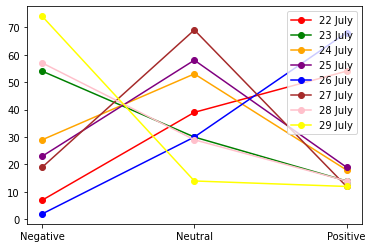

In [11]:
for i in range(8):
    start_date=datetime.datetime(2020,7,22+i,0,0,0)
    end_date=datetime.datetime(2020,7,23+i,0,0,0)
    tweets_data=api.search('china', count=1000, lang='en',include_rts=False, tweet_mode='extended',since=start_date,until=end_date)
    print("number of tweets found :"+str(len(tweets_data)))
    tweets=pd.DataFrame()
    for status in tweets_data:
        tweets=tweets.append(status._json,ignore_index=True)
    tweets.head()
    #tweets.to_csv('tweets'+str(22+i)+'July.csv')
    tweets['Sentiment']=tweets['full_text'].apply(ComputeSentimentScore)
    #tweets[['full_text', 'Sentiment']].head()
    GroupedData=tweets.groupby('Sentiment').size()
    plt.plot(GroupedData,color=Color[i],marker='o',label=str(22+i)+' July')
plt.legend()
plt.show()

In [51]:
import matplotlib.pyplot as plt
from textblob import TextBlob

In [38]:
Polarity=[]
Subjectivity=[]

In [39]:
for i in range(8):
    start_date=datetime.datetime(2020,7,22+i,0,0,0)
    end_date=datetime.datetime(2020,7,23+i,0,0,0)
    tweets_data=api.search('china', count=1000, lang='en',include_rts=False, tweet_mode='extended',since=start_date,until=end_date)
    print("number of tweets found :"+str(len(tweets_data)))
    tweets=pd.DataFrame()
    for status in tweets_data:
        tweets=tweets.append(status._json,ignore_index=True)
    tweets.head()
    tweets_str=tweets['full_text'].to_string()
    #tweets_str
    tweets_str=re.sub(r'\n',' ',tweets_str)
    tweets_str=re.sub(r'[^a-z A-Z]',' ',tweets_str)
    tweets_str=re.sub(' +',' ',tweets_str)
    tweetsInBlobFormat=TextBlob(tweets_str)
    tweetsInBlobFormat.sentiment
    Polarity.append(tweetsInBlobFormat.sentiment[0])
    Subjectivity.append(tweetsInBlobFormat.sentiment[1])

number of tweets found :100
number of tweets found :98
number of tweets found :100
number of tweets found :100
number of tweets found :100
number of tweets found :100
number of tweets found :100
number of tweets found :100


In [40]:
Polarity

[0.2547619047619047,
 0.18887310606060606,
 0.23006993006993007,
 0.2668181818181818,
 0.006038961038961039,
 0.15151098901098906,
 0.022623966942148747,
 -0.0625]

In [41]:
Subjectivity

[0.5946428571428573,
 0.483234126984127,
 0.39300699300699293,
 0.3321717171717172,
 0.04071428571428572,
 0.4101190476190476,
 0.47768595041322315,
 0.19270833333333331]

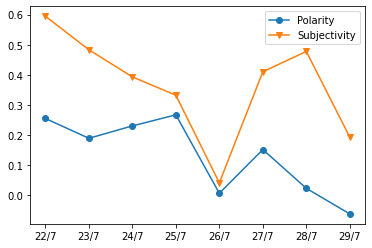

In [50]:
plt.plot(Polarity,marker='o',label='Polarity')
plt.plot(Subjectivity,marker='v',label='Subjectivity')
plt.legend()
plt.xticks([0,1,2,3,4,5,6,7],['22/7','23/7','24/7','25/7','26/7','27/7','28/7','29/7'])
plt.show()